In [0]:
import tensorflow as tf

In [0]:
tf.__version__

'2.2.0'

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten,Conv2D
from tensorflow.keras.models import Sequential
from google.colab.patches import cv2_imshow

In [0]:
angerUrl="/content/drive/My Drive/Projects/Facial Expression Detection/Facial Expression Detection/CK+48/anger/"
contemptUrl="/content/drive/My Drive/Projects/Facial Expression Detection/Facial Expression Detection/CK+48/contempt/"
disgustUrl="/content/drive/My Drive/Projects/Facial Expression Detection/Facial Expression Detection/CK+48/disgust/"
fearUrl="/content/drive/My Drive/Projects/Facial Expression Detection/Facial Expression Detection/CK+48/fear/"
happyUrl="/content/drive/My Drive/Projects/Facial Expression Detection/Facial Expression Detection/CK+48/happy/"
sadnessUrl="/content/drive/My Drive/Projects/Facial Expression Detection/Facial Expression Detection/CK+48/sadness/"
surpriseUrl="/content/drive/My Drive/Projects/Facial Expression Detection/Facial Expression Detection/CK+48/surprise/"


In [0]:
img1=cv2.imread(str(angerUrl)+"S010_004_00000017.png",1)

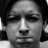

In [0]:
cv2_imshow(img1)

In [0]:
import os
angerdirs = os.listdir(angerUrl)
contemptdirs = os.listdir(contemptUrl)
disgustdirs = os.listdir(disgustUrl)
feardirs = os.listdir(fearUrl)
happydirs = os.listdir(happyUrl)
sadnessdirs = os.listdir(sadnessUrl)
surprisedirs = os.listdir(surpriseUrl)

anger=[]
contempt=[]
disgust=[]
fear=[]
happy=[]
sadness=[]
surprise=[]
for file in angerdirs:
   anger.append(file)
print(len(anger))
for file in contemptdirs:
   contempt.append(file)
print(len(contempt))
for file in disgustdirs:
   disgust.append(file)
print(len(disgust))
for file in feardirs:
   fear.append(file)
print(len(fear))
for file in happydirs:
   happy.append(file)
print(len(happy))
for file in sadnessdirs:
   sadness.append(file)
print(len(sadness))
for file in surprisedirs:
   surprise.append(file)
print(len(surprise))

135
54
177
75
207
84
249


In [0]:
inputimages=[]
angerdata=[]
count=0
for file in anger:
  temp=cv2.imread(str(angerUrl)+str(file),1)
  angerdata.append(temp)
  inputimages.append(temp)
print(len(angerdata))
contemptdata=[]
for file in contempt:
  temp=cv2.imread(str(contemptUrl)+str(file),1)
  contemptdata.append(temp)
  inputimages.append(temp)
print(len(contempt))
disgustdata=[]

for file in disgust:
  temp=cv2.imread(str(disgustUrl)+str(file),1)
  disgustdata.append(temp)
  inputimages.append(temp)
  
print(len(disgust))
feardata=[]
for file in fear:
  temp=cv2.imread(str(fearUrl)+str(file),1)
  feardata.append(temp)
  inputimages.append(temp)
print(len(feardata))
happydata=[]
for file in happy:
  temp=cv2.imread(str(happyUrl)+str(file),1)
  happydata.append(temp)
  inputimages.append(temp)
print(len(happydata))
sadnessdata=[]
for file in sadness:
  temp=cv2.imread(str(sadnessUrl)+str(file),1)
  sadnessdata.append(temp)
  inputimages.append(temp)
print(len(sadnessdata))
surprisedata=[]
for file in surprise:
  temp=cv2.imread(str(surpriseUrl)+str(file),1)
  surprisedata.append(temp)
  inputimages.append(temp)
print(len(surprisedata))
print(len(inputimages))

135
54
177
75
207
84
249
981


In [0]:
angerdata=np.array(angerdata)
contemptdata=np.array(contemptdata)
disgustdata=np.array(disgustdata)
feardata=np.array(feardata)
happydata=np.array(happydata)
sadnessdata=np.array(sadnessdata)
surprisedata=np.array(surprisedata)
inputimages=np.array(inputimages)

In [0]:
print(angerdata.shape)
print(contemptdata.shape)
print(disgustdata.shape)
print(feardata.shape)
print(happydata.shape)
print(sadnessdata.shape)
print(surprisedata.shape)
print(inputimages.shape)

(135, 48, 48, 3)
(54, 48, 48, 3)
(177, 48, 48, 3)
(75, 48, 48, 3)
(207, 48, 48, 3)
(84, 48, 48, 3)
(249, 48, 48, 3)
(981, 48, 48, 3)


In [0]:
Y=[]
for i in range(135):
  Y.append(0)
for i in range(135,189):
  Y.append(1)
for i in range(189,366):
  Y.append(2)
for i in range(366,441):
  Y.append(3)
for i in range(441,648):
  Y.append(4)
for i in range(648,732):
  Y.append(5)
for i in range(732,981):
  Y.append(6)
print(len(Y))

981


In [0]:
Y=np.array(Y)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_test,y_train,y_test=train_test_split(inputimages,Y,test_size=0.1)

In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(882, 48, 48, 3)
(882,)
(99, 48, 48, 3)
(99,)


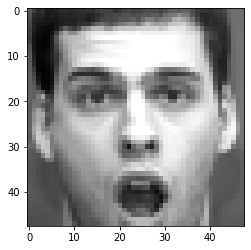

In [0]:
plt.imshow(x_train[0])

In [0]:
x_train=x_train/255.0
x_test=x_test/255.0

In [0]:
print(np.max(x_train))
print(np.min(x_train))

1.0
0.0


In [0]:
num_features=64
num_labels=7
batchsize=16
epochs=30

In [0]:
from tensorflow.keras.layers import MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow import one_hot

In [0]:
model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=x_train[0].shape))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(7,activation='softmax'))

In [0]:
#model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.001),metrics=['Accuracy'])
model.compile(optimizer=Adam(lr=0.0005),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_282 (Conv2D)          (None, 46, 46, 64)        1792      
_________________________________________________________________
conv2d_283 (Conv2D)          (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_143 (MaxPoolin (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_284 (Conv2D)          (None, 20, 20, 128)       73856     
_________________________________________________________________
conv2d_285 (Conv2D)          (None, 18, 18, 128)       147584    
_________________________________________________________________
max_pooling2d_144 (MaxPoolin (None, 9, 9, 128)         0         
_________________________________________________________________
conv2d_286 (Conv2D)          (None, 7, 7, 256)       

In [0]:
#y_train=one_hot(y_train,depth=7)
#y_test=one_hot(y_test,depth=7)

In [0]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=1,shuffle=True,epochs=50)

Epoch 1/50
28/28 [==============================] - 1s 33ms/step - loss: 1.8602 - accuracy: 0.2154 - val_loss: 1.7669 - val_accuracy: 0.2828
Epoch 2/50
28/28 [==============================] - 0s 13ms/step - loss: 1.8294 - accuracy: 0.2438 - val_loss: 1.7432 - val_accuracy: 0.2828
Epoch 3/50
28/28 [==============================] - 0s 13ms/step - loss: 1.8286 - accuracy: 0.2506 - val_loss: 1.6500 - val_accuracy: 0.3434
Epoch 4/50
28/28 [==============================] - 0s 14ms/step - loss: 1.3437 - accuracy: 0.4626 - val_loss: 0.8393 - val_accuracy: 0.6970
Epoch 5/50
28/28 [==============================] - 0s 13ms/step - loss: 0.8595 - accuracy: 0.6689 - val_loss: 0.6061 - val_accuracy: 0.7677
Epoch 6/50
28/28 [==============================] - 0s 13ms/step - loss: 0.6694 - accuracy: 0.7449 - val_loss: 0.4979 - val_accuracy: 0.8182
Epoch 7/50
28/28 [==============================] - 0s 13ms/step - loss: 0.6121 - accuracy: 0.7721 - val_loss: 0.4934 - val_accuracy: 0.8384
Epoch 8/50
28

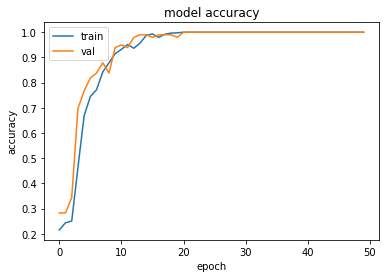

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

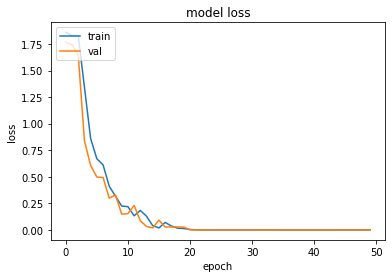

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [0]:
fer_json=model.to_json()
with open("/content/drive/My Drive/Projects/Facial Expression Detection/fer.json","w") as json_file:
  json_file.write(fer_json)
model.save_weights('/content/drive/My Drive/Projects/Facial Expression Detection/fer.h5')